**Image Classification For Galaxy10**
<br>To implement Classification model, Here I used CNN. to categorize astronomical pictures using prebuilt models in Tensorflow.

1. First Importing all, required librarires.

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
import matplotlib.pyplot as plt

2. Loading data in images_data and labels_data. here im using kaggle environment. so, loading data is here will be according to it.
<br>(ps: change the code here according to your working environment for loading the data.)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
labels_data=np.load('/content/drive/MyDrive/Datasets/labels1.npy' ,mmap_mode='r')
labels_data.shape
images_data=np.load('/content/drive/MyDrive/Datasets/images1.npy' ,mmap_mode='r')
images_data.shape

(21785, 69, 69, 3)

In [8]:
images_data.shape
images_data[0]

memmap([[[16, 18, 15],
         [18, 20, 15],
         [16, 17, 12],
         ...,
         [ 6,  6,  4],
         [ 9,  9,  7],
         [ 6,  6,  4]],

        [[19, 24, 20],
         [23, 25, 20],
         [17, 18, 13],
         ...,
         [ 8,  5,  3],
         [10,  8,  6],
         [ 6,  6,  4]],

        [[17, 22, 18],
         [21, 24, 19],
         [17, 18, 13],
         ...,
         [ 8,  4,  3],
         [11,  8,  7],
         [ 7,  6,  4]],

        ...,

        [[17, 14,  7],
         [18, 17,  9],
         [15, 14,  7],
         ...,
         [ 2,  4,  0],
         [ 3,  5,  0],
         [ 5,  7,  2]],

        [[22, 14, 11],
         [19, 14,  8],
         [12,  9,  3],
         ...,
         [ 4,  7,  0],
         [ 6,  9,  2],
         [ 7, 10,  3]],

        [[30, 12, 11],
         [31, 14,  8],
         [24,  9,  2],
         ...,
         [ 8, 11,  3],
         [11, 14,  6],
         [12, 15,  7]]], dtype=uint8)

3. Spliting the data into, <br>x_train(image training set)<br>Y_train(labels training set)<br>x_test(image test/validation set)<br>Y_test(labels test/validation set)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(images_data, labels_data, test_size=0.2, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train[0]

(17428, 69, 69, 3)
(17428,)
(4357, 69, 69, 3)
(4357,)


array([[[12, 12, 10],
        [ 8,  7,  5],
        [ 8,  7,  5],
        ...,
        [ 2,  1,  0],
        [ 2,  1,  0],
        [ 3,  2,  0]],

       [[ 7,  7,  5],
        [ 3,  4,  2],
        [ 4,  4,  2],
        ...,
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 2,  1,  0]],

       [[ 2,  2,  1],
        [ 1,  2,  0],
        [ 2,  3,  1],
        ...,
        [ 3,  2,  0],
        [ 4,  3,  1],
        [ 5,  4,  2]],

       ...,

       [[ 9,  8,  6],
        [ 8,  7,  5],
        [ 6,  5,  3],
        ...,
        [ 5,  4,  2],
        [ 2,  1,  0],
        [ 4,  3,  1]],

       [[ 7,  6,  4],
        [ 8,  7,  5],
        [ 6,  5,  3],
        ...,
        [ 8,  7,  5],
        [ 5,  4,  2],
        [ 3,  2,  1]],

       [[ 5,  4,  2],
        [ 5,  4,  2],
        [ 6,  5,  3],
        ...,
        [ 9,  8,  6],
        [ 7,  6,  4],
        [ 4,  3,  1]]], dtype=uint8)

4. Using Data agumentation for decreasing overfitting, adding images with flipped,rotated and zoomed to increase the data set, as it decreases the overfitting problem.

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(69,69,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

5. Creating a model with adding layers, from starting with less complex to catch major details and increasing complex layers to catch small details. <br>Here using regularisation technique(dropout) to further decrease the problem of overfitting.

In [22]:
num_classes = 10

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.build(input_shape=(None,69, 69, 3))
weights, bias = model.layers[-1].weights

6. Compiling model by using "adam" optimizer and  Sparse Categorical Crossentropy loss function and taking note of metrics like accuracy of model.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 69, 69, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 69, 69, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 34, 34, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                 

7. Finally training the model,<br> here i used changing learning rate for model to converge to minimum rather then fluctuating.<br> and a early stopping method to stop model training when model overfits or its performance decreases.

In [28]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)


def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/15
545/545 [==============================] - 4s 8ms/step - loss: 0.5528 - accuracy: 0.7960 - val_loss: 0.5347 - val_accuracy: 0.8054 - lr: 6.0653e-04
Epoch 2/15
545/545 [==============================] - 4s 8ms/step - loss: 0.5416 - accuracy: 0.8045 - val_loss: 0.5179 - val_accuracy: 0.8120 - lr: 6.0653e-04
Epoch 3/15
545/545 [==============================] - 5s 9ms/step - loss: 0.5385 - accuracy: 0.8065 - val_loss: 0.4909 - val_accuracy: 0.8217 - lr: 6.0653e-04
Epoch 4/15
545/545 [==============================] - 4s 8ms/step - loss: 0.5231 - accuracy: 0.8081 - val_loss: 0.5018 - val_accuracy: 0.8155 - lr: 6.0653e-04
Epoch 5/15
545/545 [==============================] - 4s 8ms/step - loss: 0.5173 - accuracy: 0.8092 - val_loss: 0.5266 - val_accuracy: 0.8070 - lr: 6.0653e-04
Epoch 6/15
545/545 [==============================] - 5s 9ms/step - loss: 0.5033 - accuracy: 0.8115 - val_loss: 0.5069 - val_accuracy: 0.8104 - lr: 5.4881e-04


8. plotting the results from model training

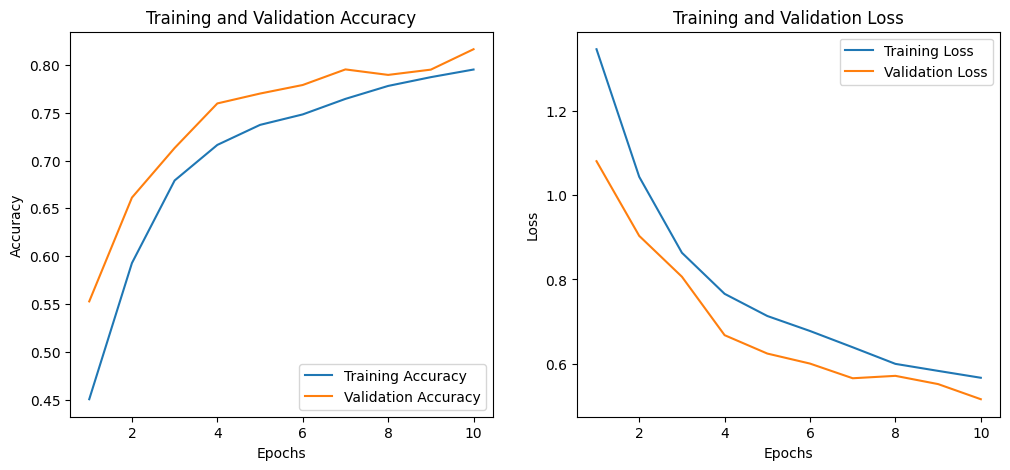

In [26]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


9. Finally model evaluating by running it on test_data.

In [27]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

137/137 - 0s - loss: 0.5160 - accuracy: 0.8164 - 368ms/epoch - 3ms/step
0.816387414932251
